# Creating custom colormaps in matplotlib using cmap_builder

In this example, we will show how to use the `cmap_builder` package to create 
complex colormaps and colorbars in matplotlib.

This tutorial covers the following topics:

### Table of contents

- [How to use cmap_builder](#how-to-use-cmap_builder)
- [Create non-uniform discrete colormaps](#create-non-uniform-discrete-colormaps)
- [Create non-uniform discrete colormaps with equally spaced color segments](#create-non-uniform-discrete-colormaps-with-equally-spaced-color-segments)
- [Create linearly varying and non-uniform colormaps](#create-linearly-varying-and-non-uniform-colormaps)
- [Why use uniform spacing in continuous colorbars? ](#why-use-uniform-spacing-in-continuous-colorbars)
- [Create descriptive colormaps](#create-descriptive-colormaps)

But, first, let us begin plotting all the named colors available in matplotlib.
A helper function is included `cmap_builder.utils.plot_colortable` to quickly make this plot.

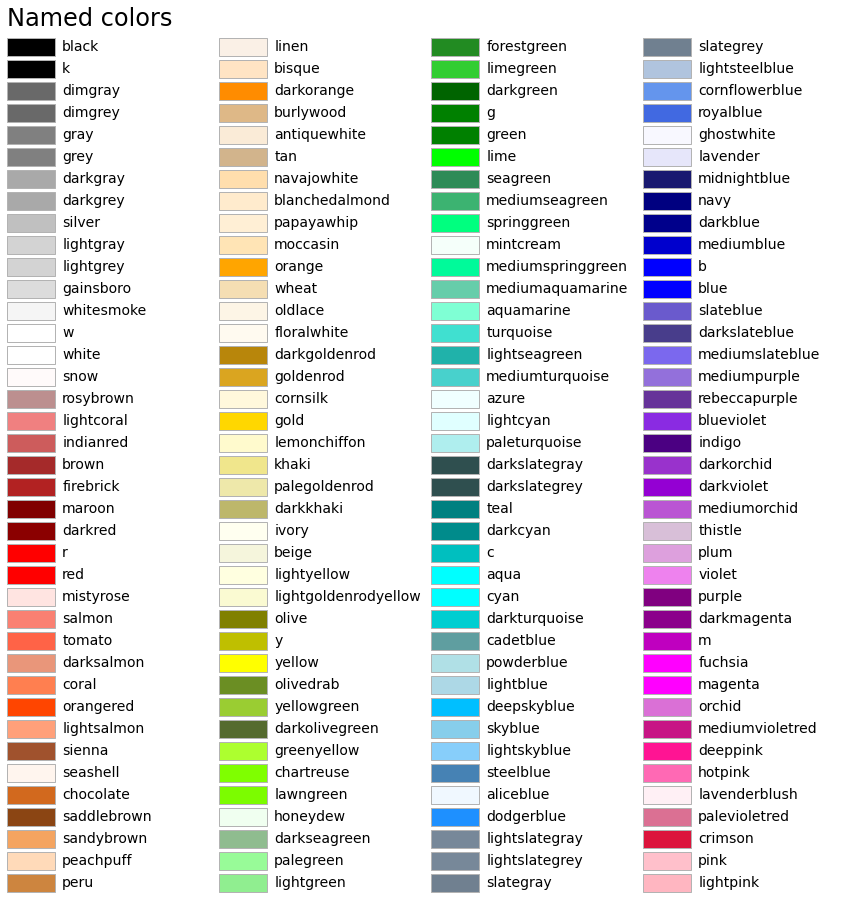

In [3]:
%matplotlib inline
from cmap_builder.utils import plot_colortable

plot_colortable()

<a id='how-to-use-cmap_builder'></a>
## How to use cmap_builder?

Custom colormaps can be built using the `cmap_builder.build_cmap()` function.

Let's see the function's help:

In [4]:
from cmap_builder import build_cmap

help(build_cmap)

Help on function build_cmap in module cmap_builder:

build_cmap(name, cmap_def, discrete=False, uniform=False, N=512)
    Build a colormap from a colormap definition (`cmap_def`) specifying the colors
    at each point across the color scale.
    The function returns a colormap, the data value indicating the boundaries of the
    color segments, and a matplotlib's normalization function.
    
    The colormap definition is a list where each entry represents the color at a given
    data value as:
    
    cmap_def = [
        (x0, color_0, [next_color_0])  # next_color_0 ignored if provided.
        (x1, color_1, [next_color_1])
        ...
        (xi, color_i, [next_color_i])
        ..
        (xn, color_n, [next_color_n])  # next_color_n is ignored if provided.
    ]
    where `color_i` represents the color immediately before the `xi` the data value.
    The optional `next_color_i` entry can be used to specify the color immediately after
    the `xi` the data value. This allow crea

Hence, in a nutshell, the first step to creating colormaps is specifying our colormap definition 
```python
cmap_def = [
        (x0, color_0, [next_color_0])  # next_color_0 ignored if provided.
        (x1, color_1, [next_color_1])
        ...
        (xi, color_i, [next_color_i])
        ..
        (xn, color_n, [next_color_n])  # next_color_n is ignored if provided.
    ]
```

Since this type of definition is very versatile, we will use it to create all sorts of colormaps.

<a id='create-non-uniform-discrete-colormaps'></a>
## Create non-uniform discrete colormaps

Now, let's start building a simple colormap that has 5 discrete colors segments *of different sizes*.

We start first by defining the colormap as a (value, color) sequence, indicating the color
at each data value. This is one of the supported colormap definitions supported by the `cmap_builder`, but not the only one! (we will see other types of definitions later on).

Although the matplotlib's colormaps map values in the (0,1) interval to colors,
the `cmap_builder` colormap definition supports using any units and intervals.
The colormap normalization is done internally by the `build_cmap` function. 
Defining the colormaps in the same data units allows one to easily create colormaps that fit particular datasets.

Without further ado, let's create the colormap.

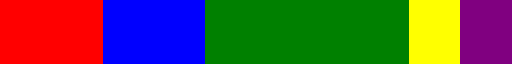

In [5]:
from cmap_builder import build_cmap

cmap_def = [
    # (value, color)
    (0, "red"),
    (2, "blue"),
    (4, "green"),
    (8, "yellow"),
    (9, "purple"),
    (10, "purple"),
    # The last repeated color is used to indicate the
    # end of the discrete colormapping.
]

# Using the definition above, with `discrete=True`, we have a colormap that
# maps the following values to colors:
# [0-2) -> red
# [2-4) -> blue
# [4-8) -> green
# [8-9) -> yellow
# [9-10) -> purple
my_cmap, my_ticks, my_norm = build_cmap(
    "non_uniform_discrete_cmap",  # Name of the colormap
    cmap_def,
    discrete=True,  # Return a discrete colormap.
    N=700,  # color palette quantization levels.
)
my_cmap  # build_cmap returns a Colormap instance.

The `build_cmap` function returns three objects:
- cmap: The colormap
- ticks: The data values corresponding to color segments definitions of the colormap.
- norm: The norm used to normalize the data into the [0,1] interval used by the color plotting functions.

Let's now use this colormap to create a simple plot.

In [6]:
# Helper function to quickly make plots.
# We will use the same function for all the examples.
def make_plot(
    cmap,
    ticks,
    norm,
    title=None,
    clabel="My colorbar",
    xlabel="",
    ylabel="",
    return_axes=False,
):
    # Make plots look pretty in the jupyter lab
    import matplotlib.ticker as ticker
    import matplotlib_inline.backend_inline
    import numpy as np
    from matplotlib import pyplot as plt

    matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
    plt.rc("font", family="serif", size=12)

    N = 1000
    X, Y = np.mgrid[-2 : 2 : complex(0, N), -2 : 2 : complex(0, N)]
    Z1 = np.exp(-(X ** 2) - Y ** 2)
    Z = Z1 * 10

    fig = plt.figure(figsize=(5, 4), dpi=300)
    fig.patch.set_facecolor("white")  # Add white background to figure
    ax = plt.gca()
    pcm = ax.pcolormesh(X, Y, Z, cmap=cmap, shading="auto", norm=norm, rasterized=True)
    cb = fig.colorbar(pcm, ticks=ticks)
    cb.set_label(clabel, labelpad=-2)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    ax.set_title(title, pad=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_aspect("equal")
    ax.axhline(0, linewidth=1.0, color="white", linestyle="--")
    ax.axvline(0, linewidth=1.0, color="white", linestyle="--")
    if return_axes:
        return ax, cb
    else:
        plt.show()

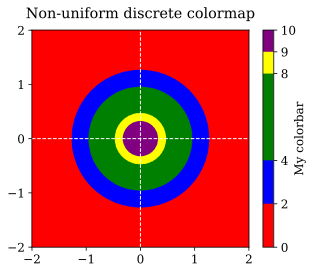

In [7]:
make_plot(my_cmap, my_ticks, norm=my_norm, title="Non-uniform discrete colormap")

<a id='create-non-uniform-discrete-colormaps-with-equally-spaced-color-segments'></a>
## Create non-uniform discrete colormaps with equally spaced color segments

Intencionally, we defined uneven color segments in the colormap.
That does not look very nice in the colorbar.

To have equally spaced elements in the colorbar, we can recreate the colormap with the "uniform=True" option.

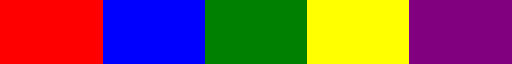

In [8]:
my_cmap, my_ticks, my_norm = build_cmap(
    "non_uniform_discrete_cmap",  # Name of the colormap
    cmap_def,
    uniform=True,  # Uniform spacing for each color segment
    discrete=True,  # Return a discrete colormap
    N=700,  # color palette quantization levels.
)

my_cmap  # build_cmap returns a Colormap instance.

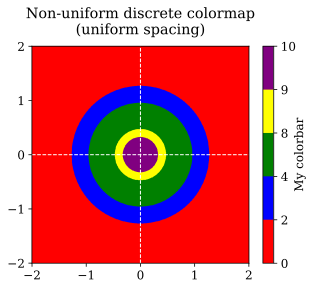

In [9]:
make_plot(
    my_cmap,
    my_ticks,
    norm=my_norm,
    title="Non-uniform discrete colormap\n(uniform spacing)",
)

<a id='create-linearly-varying-and-non-uniform-colormaps'></a>
## Create linearly varying and non-uniform colormaps

Now, let's use the colormap builder to create the same colormaps as before but using a continuous color transition.
We use the same colormap definition as before, but this time we pass `discrete=False`.

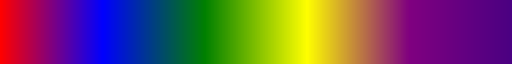

In [10]:
cmap_def = [
    # (value, color)
    (0, "red"),
    (2, "blue"),
    (4, "green"),
    (8, "yellow"),
    (9, "purple"),
    (10, "indigo"),
    # The last repeated color is used to indicate the
    # end of the discrete colormapping.
]

# Using the definition above, with `discrete=False`, we have a colormap that
# maps the following values to colors:
# [0-2)  -> varies from red to blue
# [2-4)  -> varies from blue to green
# [4-8)  -> varies from green to yellow
# [8-9)  -> varies from yellow to purple
# [9-10) -> varies from purple to indigo

my_cmap, my_ticks, my_norm = build_cmap(
    "non_uniform_continuous_cmap",  # Name of the colormap
    cmap_def,
    uniform=True,  # Uniform spacing for each color segment
    discrete=False,  # Return a discrete colormap
    N=700,  # color palette quantization levels.
)
my_cmap

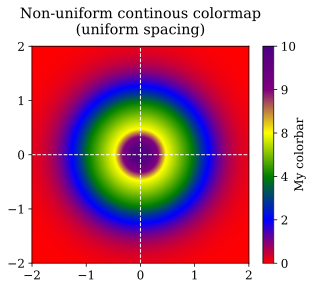

In [11]:
make_plot(
    my_cmap,
    my_ticks,
    norm=my_norm,
    title="Non-uniform continous colormap\n(uniform spacing)",
)

<a id='why-use-uniform-spacing-in-continuous-colorbars'></a>
## Why use uniform spacing in continuous colorbars? 

Using uniform spacing for the colormap segments gives additional control to
the level of details of the plots. 
To better explain this point, let's give a hypothetical meaning to the plots that we showed before. 
Let's say we want to plot the "happiness" of a hummingbird as a function of the distance to the flower.
Then, the x- and the y-axes denote the distance to the flower in meters, and the value of the function we plot is a measure of happiness. The happiness can be interpreted as the hummingbird being:

- [0,2): Desperate!.
- [2, 4]: Worried.
- [4-8]: A little worried.
- [8-9]: Happy.
- [9-10]: Extremely happy

Then, each of the above intervals has a particular (totally made up) meaning. 
Although any colormap (and their colorbar) can display the hummingbird mood as the function of distance, the boundaries where there is a transition of "happiness" are not clear. We can, of course, add contours to clearly denote the boundaries. 

However, in the next section, we will see an alternative way to quickly see the type of mood of the little bird using more descriptive colormaps.

<a id='create-descriptive-colormaps'></a>
## Create descriptive colormaps

The previous examples showed how the `cmap_builder` library can create simple colormaps. 
Now, let's make an awesome and very descriptive colorbar.

For that, we will create a colormap with the following properties:

- Each different mood category is denoted by a different color.
- Within each category, the values vary from light to dark colors according to the mood intensity.
  
Therefore, let's build a colormap like this:

- [0,2): Desperate!. Varying from dark to light green.
- [2, 4]: Worried.  Varying from dark to light purple.
- [4-8]: A little worried. Varying from dark to light orange.
- [8-9]: Happy. Varying from dark to light yellow.
- [9-10]: Extremely happy. Varying from dark to light green.

Note that the mood intensity increases with decreasing values of our happiness measure of the happiness.

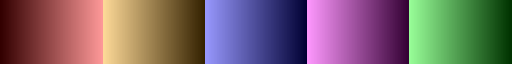

In [12]:
cmap_def = [
    # (value, color)
    (0, "red_dark"),
    (2, "red_light", "orange_light"),
    (4, "orange_dark", "blue_light"),
    (8, "blue_dark", "purple_light"),
    (9, "purple_dark", "green_light"),
    (10, "green_dark"),
    # The last repeated color is used to indicate the
    # end of the discrete colormapping.
]


my_cmap, my_ticks, my_norm = build_cmap(
    "hummingbird_happyness",  # Name of the colormap
    cmap_def,
    uniform=True,
    N=700,  # color palette quantization levels.
)

my_cmap  # build_cmap returns a Colormap instance.

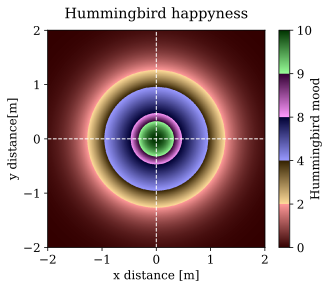

In [13]:
make_plot(
    my_cmap,
    my_ticks,
    norm=my_norm,
    title="Hummingbird happyness",
    xlabel="x distance [m]",
    ylabel="y distance[m]",
    clabel="Hummingbird mood",
)

We can go one step further and replace the tick labels in the colorbar with different moods.

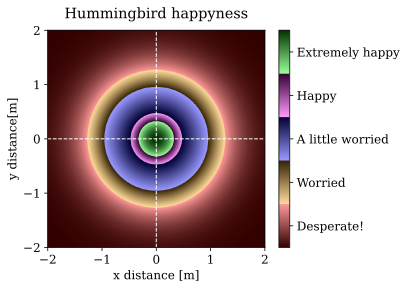

In [14]:
ax, cbar = make_plot(
    my_cmap,
    my_ticks,
    norm=my_norm,
    title="Hummingbird happyness",
    xlabel="x distance [m]",
    ylabel="y distance[m]",
    clabel="",
    return_axes=True,
)

mid_point_ticks = [1, 3, 6, 8.5, 9.5]
mood_labels = ["Desperate!", "Worried", "A little worried", "Happy", "Extremely happy"]

_ = cbar.ax.set_yticks(mid_point_ticks)
_ = cbar.ax.set_yticklabels(mood_labels)

The previous plot describes the evolution of the little bird's mood as it approaches a flower.
We can see, for example, where the mood transition takes place and how the intensity of the mood changes with distance.

# The end